### Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.patches import Polygon

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import EarthLocation, Angle
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import download_file


import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook"

from tqdm import tqdm
from pyvo.dal import sia  #new! for what? Simple Image Access

In [122]:
# Sometimes the "Downloading the DECam Images from NOIRLab" have TimeOutError

from astropy.utils.data import download_file
filename = download_file(url, cache=True, show_progress=True, timeout=120)


### Import dataset

In [3]:
telemetry1 = pd.read_csv('decam_telemetry_20230817.csv.gz')
streaks1 = pd.read_csv('streaks_augmented_20230817.csv.gz')

In [5]:
telemetry1
streaks1

,filename,rnum,ra_1,ra_2,ra_3,ra_4,dec_1,dec_2,dec_3,dec_4,expnum,ccdnum,band
0,D00145425_g_c03_r4148p01_hstreak.fits,3,1.159330,1.160919,1.164310,1.162720,-28.724241,-28.724212,-28.857155,-28.857183,145425,3,g
1,D00145425_g_c06_r4148p01_hstreak.fits,1,0.986677,0.986711,0.644209,0.644186,-29.032018,-29.034283,-29.037208,-29.034944,145425,6,g
2,D00145425_g_c09_r4148p01_hstreak.fits,1,0.452852,0.452942,0.109842,0.109782,-29.193042,-29.199694,-29.203265,-29.196615,145425,9,g
3,D00145425_g_c15_r4148p01_hstreak.fits,1,0.286716,0.286812,0.630816,0.630741,-29.363308,-29.358405,-29.362739,-29.367644,145425,15,g
4,D00145425_g_c16_r4148p01_hstreak.fits,1,0.985852,0.987446,0.987211,0.985615,-29.216748,-29.216752,-29.366385,-29.366381,145425,16,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...
879115,D01223535_g_c05_r6224p01_hstreak.fits,1,323.500201,323.502653,323.444690,323.442238,-17.828499,-17.830897,-17.884254,-17.881855,1223535,5,g
879116,D01223535_g_c31_r6224p01_hstreak.fits,1,324.355544,324.369908,324.372363,324.357994,-18.392109,-18.391941,-18.541070,-18.541235,1223535,31,g
879117,D01223535_g_c56_r6224p01_hstreak.fits,1,322.914589,322.934330,322.849385,322.829651,-19.193809,-19.210870,-19.298406,-19.281342,1223535,56,g
879118,D01223535_g_c58_r6224p01_hstreak.fits,1,323.771850,323.783894,323.835739,323.823696,-19.214779,-19.204086,-19.255903,-19.266598,1223535,58,g


### Dataset Info

In [9]:
telemetry1.loc[telemetry1['EXPNUM']==1033925] # To pick a specific expnum

,EXPNUM,BAND,TELESCOP,OBSERVAT,INSTRUME,OBS-LONG,OBS-LAT,OBS-ELEV,TELEQUIN,TIMESYS,DATE-OBS,TIME-OBS,DARKTIME,EXPTIME,RA,DEC,AZ,ZD
438810,1033925,i,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2021-09-17 04:27:56.006854,04:27:56.006854,51.2278,50.0,00:26:00.150,20:29:30.098,17.0376,52.63


In [12]:
streaks1.loc[streaks1['expnum']==1033925]

,filename,rnum,ra_1,ra_2,ra_3,ra_4,dec_1,dec_2,dec_3,dec_4,expnum,ccdnum,band
767752,D01033925_i_c07_r5373p01_hstreak.fits,1,7.148837,7.152093,7.084159,7.080905,21.304411,21.303121,21.153428,21.154718,1033925,7,i
767753,D01033925_i_c12_r5373p01_hstreak.fits,1,7.074959,7.077347,7.009662,7.007275,21.140356,21.139408,20.989995,20.990942,1033925,12,i
767754,D01033925_i_c17_r5373p01_hstreak.fits,1,7.000296,7.004413,6.936452,6.932335,20.977353,20.975719,20.825416,20.827048,1033925,17,i
767755,D01033925_i_c23_r5373p01_hstreak.fits,1,6.925718,6.929846,6.863136,6.859010,20.813371,20.811767,20.660970,20.662572,1033925,23,i
767756,D01033925_i_c29_r5373p01_hstreak.fits,1,6.852514,6.856630,6.788693,6.784578,20.648856,20.647228,20.496232,20.497858,1033925,29,i
767757,D01033925_i_c36_r5373p01_hstreak.fits,1,6.779046,6.783161,6.715368,6.711255,20.484258,20.482635,20.331532,20.333153,1033925,36,i
767758,D01033925_i_c42_r5373p01_hstreak.fits,1,6.705883,6.710001,6.642878,6.638764,20.319686,20.318077,20.167063,20.168669,1033925,42,i
767759,D01033925_i_c48_r5373p01_hstreak.fits,1,6.632553,6.636666,6.570124,6.566015,20.155066,20.153470,20.002693,20.004286,1033925,48,i
767760,D01033925_i_c53_r5373p01_hstreak.fits,1,6.559712,6.563824,6.497691,6.493584,19.990880,19.989291,19.838673,19.840258,1033925,53,i
767761,D01033925_i_c57_r5373p01_hstreak.fits,1,6.487887,6.491131,6.425430,6.422190,19.826357,19.825105,19.675125,19.676375,1033925,57,i


In [14]:
#telemetry1.columns

In [16]:
row_958013 = telemetry1.loc[telemetry1['EXPNUM']==1033925]
ra = row_958013['RA']
dec = row_958013['DEC']
print(ra.values, dec.values)
#Convert the data in different coordinates
coord = SkyCoord(ra=row_958013['RA'].values[0], dec=row_958013['DEC'].values[0], unit=u.deg)
print(coord.icrs.ra.value, coord.icrs.dec.value)

['00:26:00.150'] ['20:29:30.098']
0.433375 20.49169388888889


### Which expnums have streaks?

In [21]:
expnum_counts = streaks1['expnum'].value_counts()
#expnums_mas_8 = expnum_counts[expnum_counts > 8].index
expnums_more_than_3 = expnum_counts[expnum_counts > 3].index    #Those expnums that have more than 3 streaks
streaks_filt= streaks1[streaks1['expnum'].isin(expnums_more_than_3)]
telemetry_filt = telemetry1[telemetry1['EXPNUM'].isin(streaks_filt['expnum'])]

In [23]:
expnum_counts[expnum_counts > 3] # How many times that exposure appear in the dataset

expnum
146084     61
146086     61
146085     61
146082     61
146083     61
           ..
563488      4
1033561     4
563493      4
563500      4
425829      4
Name: count, Length: 78284, dtype: int64

In [26]:
expnums_more_than_3 = expnum_counts[expnum_counts > 3].index.tolist() # Which are those exposures that have more than 3 streaks

### Finding Starlinks in all the dataset

In [28]:
expnumtry = telemetry1['EXPNUM'].drop_duplicates().sample(5)  # Usando una muestra de los datos sin filtrar, para ver si hay mas starlinks con menos de 8 streaks

In [29]:
site = EarthLocation.of_site('ctio')
# Contenedores de resultados
expnum_starlink   = []   # exposures que tuvieron al menos 1 STARLINK
satmap_starlink   = []   # lista de nombres Starlink para cada exposure
satmap_completo   = {}  
todos_satelites = {} 
starlinks_en_exp = []
fov_radius=1   # Field of view

In [30]:
for exp in tqdm(expnumtry, desc="Buscando STARLINKs"):
    #fila = telemetry1_filtrado[telemetry1_filtrado['EXPNUM'] == exp].iloc[0] #row
    fila = telemetry1[telemetry1['EXPNUM'] == exp].iloc[0] #row

    #print(fila)
    try:
        ra = fila['RA']
        dec = fila['DEC']
        latitude = fila ['OBS-LAT']
        longitude = fila['OBS-LONG']
        elevation = fila['OBS-ELEV']
        exptime = fila['EXPTIME']
        timeobs = fila['TIME-OBS']
        dateobs = fila['DATE-OBS']
        duration = fila['EXPTIME']
        start_time_jd = Time(fila['DATE-OBS']).jd

        # Conversión de coordenadas y fecha
        coord = SkyCoord(ra=fila['RA'], dec=fila['DEC'], unit=u.deg)
        ra_center = coord.icrs.ra.value
        dec_center = coord.icrs.dec.value
        print(f"Running query for expnum{exp}")
        
        # URL para la API
        url = f"https://dev.satchecker.cps.iau.noirlab.edu/fov/satellite-passes/?latitude={latitude}&longitude={longitude}&elevation={elevation}&start_time_jd={start_time_jd}&duration={duration}&ra={ra_center}&dec={dec_center}&fov_radius={fov_radius}&group_by=satellite"
        response = requests.get(url, timeout=60)
        response.raise_for_status()
        data = response.json()['data']['satellites']            
        
        # Guardar todos los satélites si quieres
        todos_satelites[exp] = list(data.keys())

        # Filtrar Starlink
        starlinks = [sat for sat in data if 'STARLINK' in sat.upper()]  # It was hard to find STARLINKs in a small sample, so I tried with COSMOS instead, they seem more common
        print(exp, starlinks)
        if starlinks:
            expnum_starlink.append(exp)
            starlinks_en_exp.append(starlinks)

    except Exception as e:
        print(f"⚠️ Error en expnum {exp}: {e}")
        continue

# Crear DataFrame con resultados
df_starlink = pd.DataFrame({
    'EXPNUM': expnum_starlink,
    'starlinks': starlinks_en_exp
})

# Vista rápida
print(df_starlink.head())

Buscando STARLINKs:   0%|                                                                        | 0/5 [00:00<?, ?it/s]

Running query for expnum1107982


Buscando STARLINKs:  20%|████████████▊                                                   | 1/5 [00:47<03:10, 47.73s/it]

1107982 []
Running query for expnum650237


Buscando STARLINKs:  40%|█████████████████████████▌                                      | 2/5 [01:30<02:15, 45.02s/it]

650237 []
Running query for expnum1202768


Buscando STARLINKs:  60%|██████████████████████████████████████▍                         | 3/5 [02:21<01:35, 47.55s/it]

1202768 ['STARLINK-4770 (53849)']
Running query for expnum550125


Buscando STARLINKs:  80%|███████████████████████████████████████████████████▏            | 4/5 [02:54<00:41, 41.75s/it]

550125 []
Running query for expnum327629


Buscando STARLINKs: 100%|████████████████████████████████████████████████████████████████| 5/5 [03:25<00:00, 41.19s/it]

327629 []
    EXPNUM                starlinks
0  1202768  [STARLINK-4770 (53849)]


#### Implementig as a function

In [ ]:
telemetry1

In [ ]:
streaks1

In [32]:
# Satchecker fov query
def run_satchecker_fov_query(latitude, longitude, elevation, duration, start_time_jd, fov_radius, ra, dec):
    """Consulta SatChecker para satélites en el campo de visión/field of view(fov)."""
    url = (
        f"https://dev.satchecker.cps.iau.noirlab.edu/fov/satellite-passes/?"
        f"latitude={latitude}&longitude={longitude}&elevation={elevation}&"
        f"start_time_jd={start_time_jd}&duration={duration}&ra={ra}&dec={dec}&"
        f"fov_radius={fov_radius}&group_by=satellite"
    )

    print(f"\nConsultando SatChecker con la siguiente URL:\n{url}") 

    try:
        response = requests.get(url, timeout=60)
        response.raise_for_status()
        data = response.json()
    except Exception as e:
        print("Error al consultar el API:", e)
        return {}

    if 'data' not in data or 'satellites' not in data['data']:
        print("Respuesta sin datos de satélites.")
        return {}

    sats = {
        k: [[p['ra'], p['dec'], p['julian_date']] for p in v['positions']]
        for k, v in data['data']['satellites'].items()
    }

    print(f"Satélites encontrados: {list(sats.keys())}")
    return sats


In [33]:
# Find Satellites in DECam expnums

def find_satellites_in_decam_exp(EXPNUM, name='STARLINK', fov=1.0, verbose=True):
    """
    Dada una exposición DECam (EXPNUM), consulta SatChecker y devuelve los satélites
    cuyo nombre contenga 'name' (por defecto STARLINK) que cruzan el campo de visión.
    """
    if EXPNUM not in telemetry1['EXPNUM'].values:  #verifica que exista el expnum
        print(f"EXPNUM {EXPNUM} no encontrado.")
        return {}

    row = telemetry1[telemetry1['EXPNUM'] == EXPNUM].iloc[0]

    #ubication and duration
    latitude = row['OBS-LAT']
    longitude = row['OBS-LONG']
    elevation = row['OBS-ELEV']
    duration = max(float(row['EXPTIME']), 1)
    start_time_jd = Time(row['DATE-OBS']).jd

    # Convierte automaticamente horas a grados, si se deja como hora, da error
    try:
        ra = Angle(row['RA'], unit='hourangle').degree if isinstance(row['RA'], str) else float(row['RA'])
    except:
        ra = float(row['RA'])

    try:
        dec = Angle(row['DEC'], unit='deg').degree if isinstance(row['DEC'], str) else float(row['DEC'])
    except:
        dec = float(row['DEC'])

        
    #SatChecker consult (defined previously)    
    sats = run_satchecker_fov_query(latitude, longitude, elevation, duration, start_time_jd, fov, ra, dec)
    if name:
        named = {k: v for k, v in sats.items() if name.upper() in k.upper()}
    else:
        named = sats
    
    #Filtrando por nombres del satelite, each satelite is called k
    named = {k: v for k, v in sats.items() if name.upper() in k.upper()}  # .upper para ponerlo todo en mayusculas
        

    # data resume
    if verbose:
        print(f"\nEXPNUM: {EXPNUM}")
        print(f"DATE-OBS: {row['DATE-OBS']} | Duración: {duration:.1f} s")
        print(f"RA: {ra:.3f} deg | DEC: {dec:.3f} deg | FOV: {fov}°")
        print(f"{len(named)} satélites con nombre '{name}' encontrados.\n")

    return named

In [35]:
def plot_satellites_in_exposure(EXPNUM, name='STARLINK', fov_radius=1.0):
    sats = find_satellites_in_decam_exp(EXPNUM, name=name, fov=fov_radius, verbose=True) # va a filtrar solo los starlink
    
    if not sats:   #si no hay starlinks, no los grafica
        print("No se encontraron satélites para graficar.")
        return
    
    row = telemetry1[telemetry1['EXPNUM'] == EXPNUM].iloc[0]
    
    
    #ra y dec en coordenadas amigables
    coord = SkyCoord(ra=row['RA'], dec=row['DEC'], unit=(u.hourangle, u.deg)) if ':' in str(row['RA']) else SkyCoord(ra=float(row['RA'])*u.deg, dec=float(row['DEC'])*u.deg)
    ra_center = coord.ra.deg
    dec_center = coord.dec.deg
    duration = float(row['EXPTIME'])
    start_time_jd = Time(row['DATE-OBS']).jd

    # Configuración de WCS (proyección del cielo en la gráfica)
    wcs = WCS(naxis=2)
    wcs.wcs.crpix = [0, 0]
    wcs.wcs.crval = [ra_center, dec_center] #centro de la imagen
    wcs.wcs.cdelt = [0.1, 0.1]  # zoom de la imagen/tamaño de pixel
    wcs.wcs.ctype = ['RA---TAN', 'DEC--TAN']

    # Plot
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(1, 1, 1, projection=wcs)

    # Campo de visión
    center = SkyCoord(ra=ra_center * u.deg, dec=dec_center * u.deg, frame='icrs')
    angles = np.linspace(0, 360, 360) * u.deg
    circle = center.directional_offset_by(angles, fov_radius * u.deg)
    ax.plot(circle.ra.deg, circle.dec.deg, c='0.75', ls='--', label='FOV', transform=ax.get_transform('world'))
 
    
    # Trayectorias de los satélites
    for sat_name, path in sats.items():
        ra = [p[0] for p in path]
        dec = [p[1] for p in path]
        times = [p[2] for p in path]

        coords = SkyCoord(ra=ra * u.deg, dec=dec * u.deg)
        ax.plot(coords.ra.deg, coords.dec.deg, transform=ax.get_transform('world'), label=sat_name)
        ax.scatter(coords.ra.deg, coords.dec.deg, transform=ax.get_transform('world'), s=6)

        # Etiquetar cada satélite
        if coords.ra.deg[0] < coords.ra.deg[-1]:
            ax.text(coords.ra.deg[0], coords.dec.deg[0], sat_name, transform=ax.get_transform('world'), fontsize=6)
        else:
            ax.text(coords.ra.deg[-1], coords.dec.deg[-1], sat_name, transform=ax.get_transform('world'), fontsize=6)

    ax.set_aspect('equal')
    ax.legend(bbox_to_anchor=(0.95, 1), loc='upper left', fontsize=6)
    ax.set_xlabel('Right Ascension')
    ax.set_ylabel('Declination')
    ax.set_title(f'Satellite Passes at JD {start_time_jd:.4f} (duration {duration:.1f} s)')
    ax.invert_xaxis()
    ax.grid(True, linestyle='--', color='lightgray')

    plt.show()


In [34]:
find_satellites_in_decam_exp(1033925)


Consultando SatChecker con la siguiente URL:
https://dev.satchecker.cps.iau.noirlab.edu/fov/satellite-passes/?latitude=-30.1661&longitude=70.8149&elevation=2215&start_time_jd=2459474.6860648943&duration=50.0&ra=6.500624999999999&dec=20.49169388888889&fov_radius=1.0&group_by=satellite
Satélites encontrados: ['LEMUR 2 BAXTER-OLIVER (46925)', 'LEMUR 2 JEREMIAH (46911)', 'STARLINK-1149 (45079)', 'STARLINK-1439 (45716)']

EXPNUM: 1033925
DATE-OBS: 2021-09-17 04:27:56.006854 | Duración: 50.0 s
RA: 6.501 deg | DEC: 20.492 deg | FOV: 1.0°
2 satélites con nombre 'STARLINK' encontrados.



{'STARLINK-1149 (45079)': [[5.57806621, 20.03054437, 2459474.6863311],
  [5.60251224, 20.07063613, 2459474.68634267],
  [5.62693891, 20.11074061, 2459474.68635424],
  [5.65134621, 20.15085779, 2459474.68636582],
  [5.67573416, 20.19098764, 2459474.68637739],
  [5.70010275, 20.23113016, 2459474.68638897],
  [5.72445198, 20.27128533, 2459474.68640054],
  [5.74878185, 20.31145312, 2459474.68641211],
  [5.77309237, 20.35163353, 2459474.68642369],
  [5.79738353, 20.39182653, 2459474.68643526],
  [5.82165533, 20.43203212, 2459474.68644684],
  [5.84590778, 20.47225027, 2459474.68645841],
  [5.87014088, 20.51248096, 2459474.68646998],
  [5.89435461, 20.55272418, 2459474.68648156],
  [5.918549, 20.59297992, 2459474.68649313],
  [5.94272403, 20.63324815, 2459474.68650471],
  [5.9668797, 20.67352886, 2459474.68651628],
  [5.99101603, 20.71382203, 2459474.68652785],
  [6.015133, 20.75412765, 2459474.68653943],
  [6.03923061, 20.7944457, 2459474.686551],
  [6.06330888, 20.83477616, 2459474.68656258


Consultando SatChecker con la siguiente URL:
https://dev.satchecker.cps.iau.noirlab.edu/fov/satellite-passes/?latitude=-30.1661&longitude=70.8149&elevation=2215&start_time_jd=2460078.9311489947&duration=92.0&ra=307.2081291666666&dec=-6.271971944444444&fov_radius=1.0&group_by=satellite
Satélites encontrados: ['RUBIN 2 (27605)', 'SL-12 R/B(2) (23429)', 'STARLINK-1457 (45674)', 'STARLINK-1672 (46537)', 'STARLINK-3319 (50847)', 'STARLINK-3811 (52383)']

EXPNUM: 1202768
DATE-OBS: 2023-05-14 10:20:51.273157 | Duración: 92.0 s
RA: 307.208 deg | DEC: -6.272 deg | FOV: 1.0°
4 satélites con nombre 'STARLINK' encontrados.



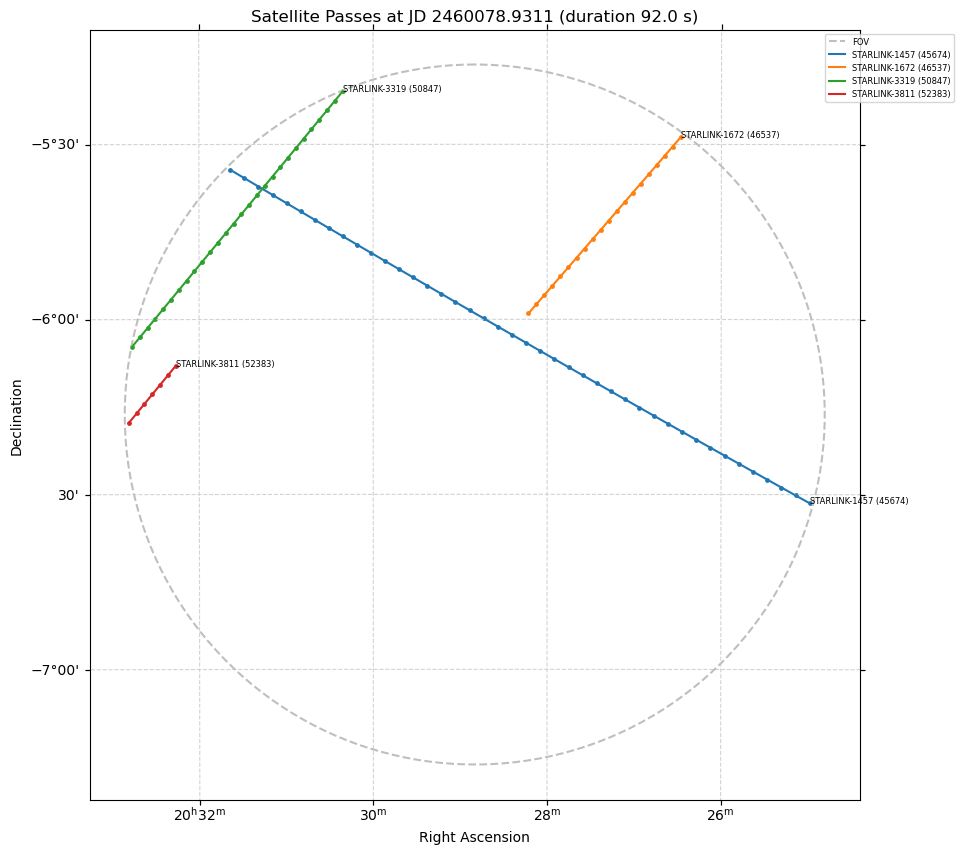

In [36]:
plot_satellites_in_exposure(1202768)

### Downloading the DECam Images from NOIRLab

In [39]:
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/nsa"
svc_nsa = sia.SIAService(DEF_ACCESS_URL)

### Download the ccd image

In [37]:
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/nsa"
svc_nsa = sia.SIAService(DEF_ACCESS_URL)

In [100]:
telemetry1.loc[telemetry1['EXPNUM']==1061946] # To pick a specific expnum

,EXPNUM,BAND,TELESCOP,OBSERVAT,INSTRUME,OBS-LONG,OBS-LAT,OBS-ELEV,TELEQUIN,TIMESYS,DATE-OBS,TIME-OBS,DARKTIME,EXPTIME,RA,DEC,AZ,ZD
449414,1061946,i,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2021-12-16 01:10:37.297935,01:10:37.297935,51.3388,50.0,01:23:39.811,02:47:55.399,341.5117,34.53


In [138]:
streaks1.loc[streaks1['expnum']==1138498]

,filename,rnum,ra_1,ra_2,ra_3,ra_4,dec_1,dec_2,dec_3,dec_4,expnum,ccdnum,band
830249,D01138498_i_c12_r6031p01_hstreak.fits,1,10.418997,10.428050,10.382911,10.373835,-43.345815,-43.347267,-43.498184,-43.496728,1138498,12,i
830250,D01138498_i_c17_r6031p01_hstreak.fits,1,10.350140,10.356850,10.329787,10.323066,-43.576386,-43.577525,-43.662320,-43.661179,1138498,17,i
830251,D01138498_i_c18_r6031p01_streak.fits,1,10.366377,10.357315,10.368835,10.377890,-43.549137,-43.547649,-43.510202,-43.511689,1138498,18,i
830252,D01138498_i_c23_r6031p01_hstreak.fits,1,10.317313,10.326399,10.280988,10.271877,-43.674731,-43.676175,-43.827338,-43.825893,1138498,23,i
830253,D01138498_i_c30_r6031p01_hstreak.fits,1,10.266452,10.275580,10.229039,10.219885,-43.839595,-43.841064,-43.992379,-43.990910,1138498,30,i
830254,D01138498_i_c37_r6031p01_hstreak.fits,1,10.214182,10.223355,10.178721,10.169525,-44.004475,-44.005875,-44.157121,-44.155721,1138498,37,i
830255,D01138498_i_c43_r6031p01_hstreak.fits,1,10.163747,10.171732,10.124078,10.116072,-44.169582,-44.170871,-44.321956,-44.320668,1138498,43,i
830256,D01138498_i_c49_r6031p01_hstreak.fits,1,10.112070,10.120079,10.072396,10.064369,-44.334255,-44.335535,-44.486498,-44.485219,1138498,49,i
830257,D01138498_i_c54_r6031p01_hstreak.fits,1,10.059514,10.068731,10.019498,10.010260,-44.498911,-44.500417,-44.651259,-44.649751,1138498,54,i
830258,D01138498_i_c59_r6031p01_hstreak.fits,1,10.006583,10.014637,9.966900,9.958828,-44.663343,-44.664613,-44.815064,-44.813792,1138498,59,i


In [115]:
# You need to check de RA and DEC at telemetry1 dataset and convert the coords
row_1114861 = telemetry1.loc[telemetry1['EXPNUM']==1049047]
ra = row_1114861['RA']
dec = row_1114861['DEC']
print(ra.values, dec.values)


#Convert the data in different coordinates
coord = SkyCoord(ra=row_1114861['RA'].values[0], dec=row_1114861['DEC'].values[0], unit=u.deg)
print(coord.icrs.ra.value, coord.icrs.dec.value)

['04:30:02.678'] ['-07:47:49.798']
4.500743888888889 -7.797166111111111


In [116]:
ra = 4.500743889
dec = -7.797166111
image_table_1202768 = svc_nsa.search((ra, dec)).to_table()

In [119]:
instcal_filter = (image_table_1202768['proctype'] == 'InstCal')
image_table_1202768_instcals = image_table_1202768[instcal_filter]

In [120]:
instcal_filter = (image_table_1202768['proctype'] == 'InstCal') & (image_table_1202768['prodtype'] == 'image')
image_table_1202768_instcals = image_table_1202768[instcal_filter]

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


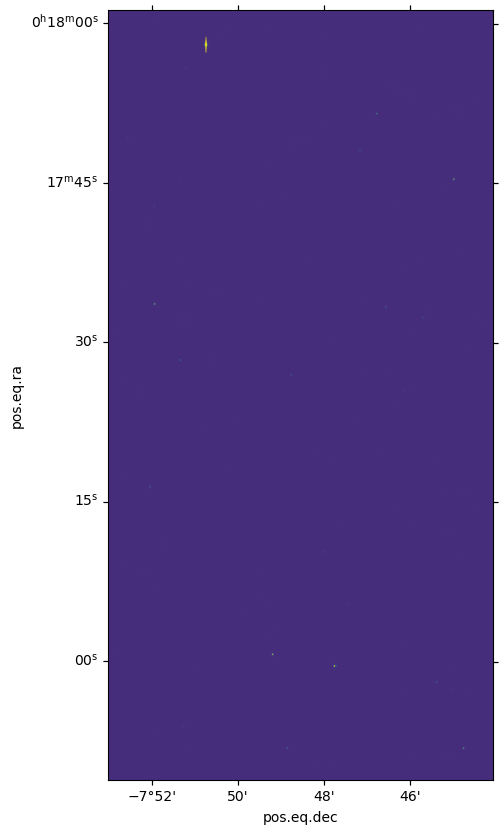

In [123]:
row = image_table_1202768_instcals[0]
url = row['access_url']#.decode()
filename = download_file(url, cache=True, show_progress=False)
hdu = fits.open(filename)[0]
image = hdu.data
hdr = hdu.header
wcs = WCS(hdr)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection=wcs)
ax.imshow(image, origin='lower')

Using API url: https://astroarchive.noirlab.edu/api/adv_search/find/?limit=20
https://astroarchive.noirlab.edu/api/retrieve/152caee75829394a36c6fe0fe16d4ca9/?hdus=12
Filename: C:\Users\ASUS\.astropy\cache\download\url\55f7278728a759ffba73fa018d97c8c1\contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     206   ()      
  1  S24           1 CompImageHDU    126   (2046, 4094)   float32   


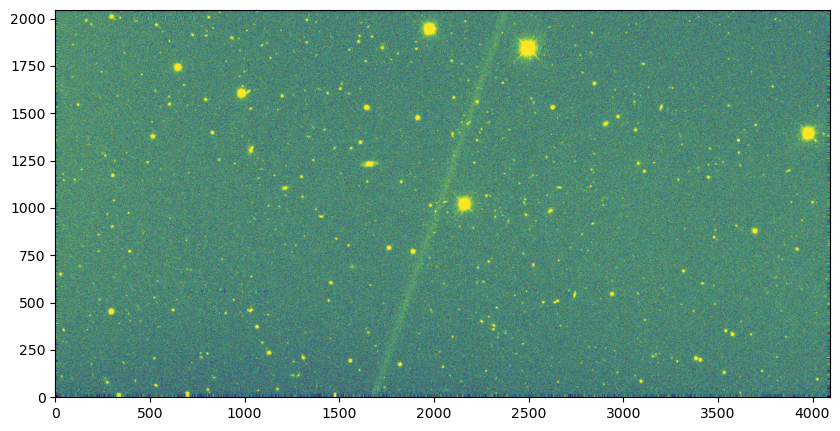

In [124]:
natroot = 'https://astroarchive.noirlab.edu'
adsurl = f'{natroot}/api/adv_search'

jj = {
    "outfields" : [
        "md5sum",
        "archive_filename",
        "dateobs_center",
        "dateobs_min",
        "dateobs_max",
        "proc_type",
        "prod_type",
        "obs_type",
        "release_date",
        "proposal",
        "caldat",
        "EXPNUM",
    ],
    "search" : [
        ["instrument", "decam"],
        ["proc_type", "instcal"],
        ["EXPNUM", 1043912, 1043912],  # requires a range
        ["prod_type", "image"],
    ]
}
apiurl = f'{adsurl}/find/?limit=20'
print(f'Using API url: {apiurl}')
data = requests.post(apiurl,json=jj).json()
query_result = pd.DataFrame(data[1:])  # there should be just 1 row
md5sum = query_result['md5sum'][0]
detector = 12                           # set this manually by looking at the DECam detector map
access_url = f'{natroot}/api/retrieve/{md5sum}/?hdus={detector}'
print(access_url)
filename = download_file(access_url, cache=True)
hdu_list = fits.open(filename)
hdu_list.info()
header = hdu_list[0].header
image = hdu_list[1].data

fig = plt.figure(figsize=(10,10))
plt.imshow(np.flip(image.T), origin='lower', vmin = np.percentile(image,5), vmax = np.percentile(image, 95))